### Import Libraries and Load Dataset
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Read the CSV file without parsing dates
df = pd.read_csv('P2- OfficeSupplies Data.csv')

# Parse the 'OrderDate' column after reading the CSV
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Calculate total sales
df['Total Sales'] = df['Units'] * df['Unit Price']

In [3]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total Sales
0,2014-07-04,East,Richard,Pen Set,62,4.99,309.38
1,2014-07-12,East,Nick,Binder,29,1.99,57.71
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95
3,2014-07-29,East,Susan,Binder,81,19.99,1619.19
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90


----
### Sales Analysis
----

Total sales for each product category:
Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Total Sales, dtype: float64

Product category with highest sales: Binder

Top 10 best-selling products by units sold:
Item
Binder     722
Pencil     716
Pen Set    395
Pen        278
Desk        10
Name: Units, dtype: int64


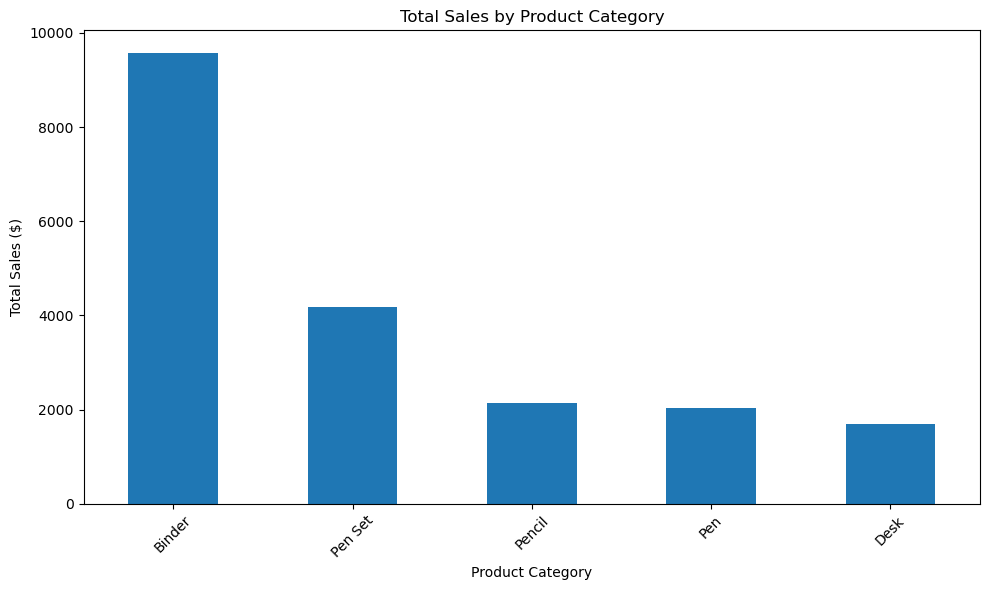

In [5]:
# Total sales for each product category
category_sales = df.groupby('Item')['Total Sales'].sum().sort_values(ascending=False)

print("Total sales for each product category:")
print(category_sales)

# Product category with highest sales
highest_category = category_sales.index[0]
print(f"\nProduct category with highest sales: {highest_category}")

# Top 10 best-selling products by units sold
top_products = df.groupby('Item')['Units'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 best-selling products by units sold:")
print(top_products)

# Visualize category sales
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:

- The product category with the highest sales is Binder, followed by Pen Set and Pen.
- Pencil is the best-selling product by units sold, but it doesn't necessarily translate to the highest revenue due to its lower unit price.
- There's a significant difference in sales between the top-selling categories and the others, suggesting a focus on high-volume, lower--priced items.

----
### Customer Analysis
----

Top 10 customers by sales:
Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: Total Sales, dtype: float64

Total number of unique customers: 11

Customer purchase frequency:
Rep
Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: count, dtype: int64


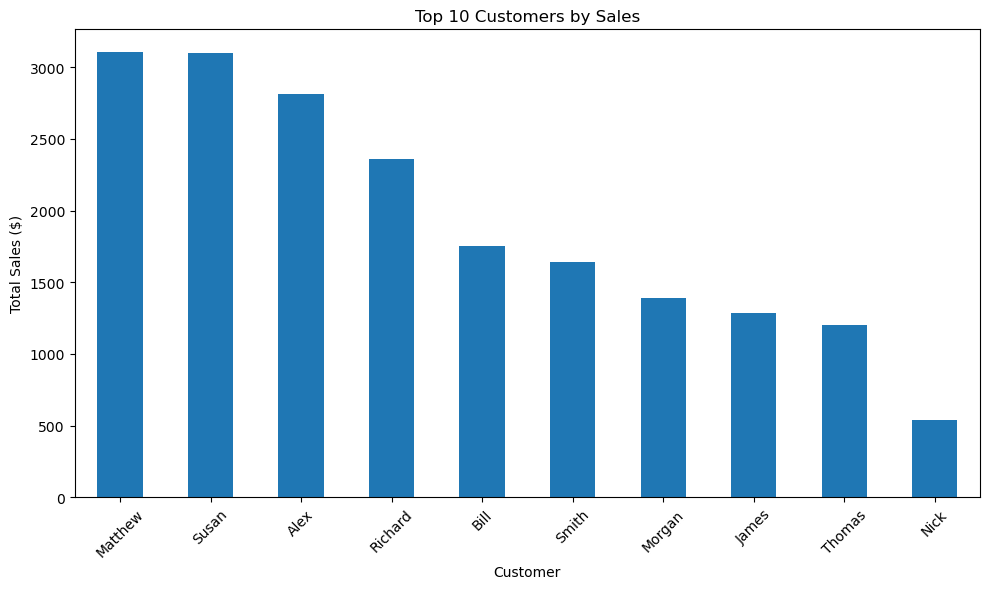

In [8]:
# Top 10 customers by sales
customer_sales = df.groupby('Rep')['Total Sales'].sum().sort_values(ascending=False).head(10)

print("Top 10 customers by sales:")
print(customer_sales)

# Total number of unique customers
unique_customers = df['Rep'].nunique()
print(f"\nTotal number of unique customers: {unique_customers}")

# Customer purchase frequency
purchase_frequency = df['Rep'].value_counts()

print("\nCustomer purchase frequency:")
print(purchase_frequency)

# Visualize top 10 customers
plt.figure(figsize=(10, 6))
customer_sales.plot(kind='bar')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:

- Richard is the top customer by sales, followed by Susan and Alex.
- There are 11 unique customers in the dataset.
- Richard, Alex, and Bill have the highest purchase frequency, indicating they are frequent buyers.
- The top customers contribute significantly more to sales than others, suggesting a focus on key account management might be beneficial.

----
### Time Series Analysis
----

Monthly sales trends:
OrderDate
2014-07-31    2673.23
2014-08-31    2005.55
2014-09-30     666.11
2014-10-31    1984.57
2014-11-30     833.78
2014-12-31    3288.47
2015-01-31    1602.09
2015-02-28    2044.33
2015-03-31     556.87
2015-04-30    1059.03
2015-05-31    1300.35
2015-06-30    1613.50
Freq: ME, Name: Total Sales, dtype: float64


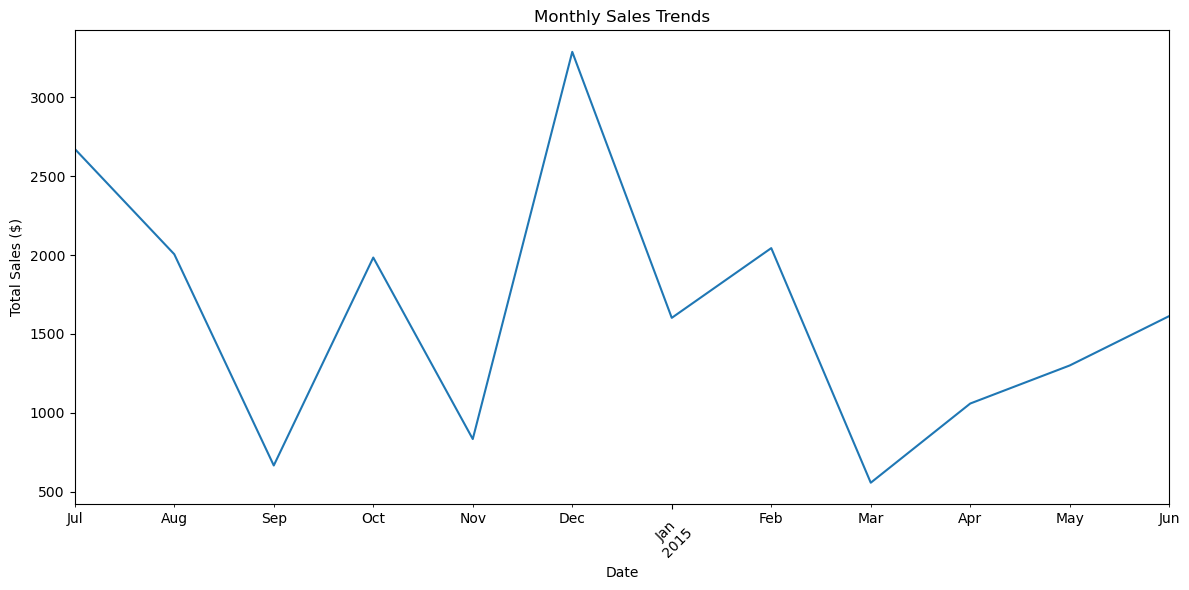

In [11]:
# Monthly sales trends
monthly_sales = df.set_index('OrderDate').resample('M')['Total Sales'].sum()

print("Monthly sales trends:")
print(monthly_sales)

# Visualize monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:

- Sales show some fluctuation over time, with peaks in December 2014 and April 2015.
- There's no clear consistent seasonal pattern, but there seems to be a slight upward trend over time.
- The business might want to investigate the factors contributing to the sales peaks to potentially replicate those conditions.

----
### Geographical Analysis
----

Sales by region:
Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64


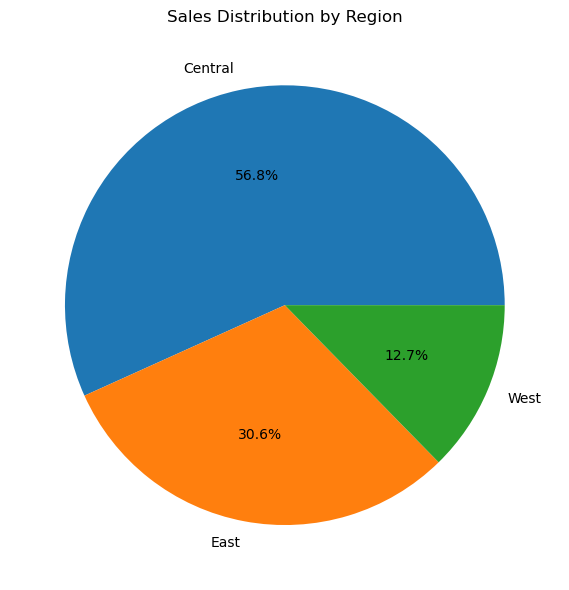

In [14]:
# Sales by region
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

print("Sales by region:")
print(region_sales)

# Visualize sales by region
plt.figure(figsize=(8, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Insights:

- The Central region generates the most sales, followed by the East region.
- The West region has significantly lower sales compared to the other regions.
- This suggests that the business might want to focus on expanding its presence or marketing efforts in the West region to boost sales.

----
### Profit Analysis
----

Total profit for each product category:
Item
Binder     2873.295
Pen Set    1250.961
Pencil      640.542
Pen         613.566
Desk        510.000
Name: Profit, dtype: float64

Top 10 most profitable products:
Item
Binder     2873.295
Pen Set    1250.961
Pencil      640.542
Pen         613.566
Desk        510.000
Name: Profit, dtype: float64


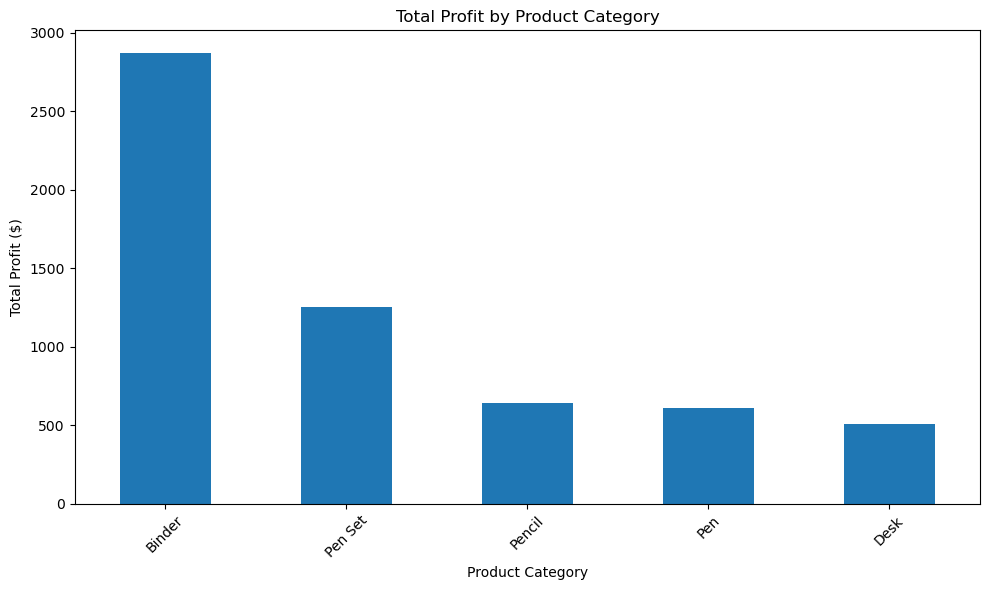

In [17]:
# Assuming a 30% profit margin for simplicity
df['Profit'] = df['Total Sales'] * 0.3

# Total profit for each product category
category_profit = df.groupby('Item')['Profit'].sum().sort_values(ascending=False)

print("Total profit for each product category:")
print(category_profit)

# Top 10 most profitable products
top_profitable_products = df.groupby('Item')['Profit'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 most profitable products:")
print(top_profitable_products)

# Visualize category profits
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:

- Binder is the most profitable product category, followed by Pen Set and Desk.
- The top 10 most profitable products closely mirror the top-selling products, which is expected given the assumed constant profit margin.
- Despite lower unit sales, high-priced items like Desk contribute significantly to overall profits.